# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng =city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"] 
        city_wind =city_weather["wind"]["speed"] 
        city_country =city_weather["sys"]["country"]
        city_date =time.ctime(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uturoa
Processing Record 2 of Set 1 | xingcheng
Processing Record 3 of Set 1 | tubarjal
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | as saffaniyah
Processing Record 6 of Set 1 | antsiranana
Processing Record 7 of Set 1 | pathein
Processing Record 8 of Set 1 | fort bragg
Processing Record 9 of Set 1 | namtsy
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | whistler
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | bethanie
Processing Record 21 of Set 1 | tionk essil
Processing Record 22 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uturoa,-16.7333,-151.4333,79.43,77,100,19.01,PF,Tue Oct 17 14:15:30 2023
1,xingcheng,40.6167,120.7167,63.03,74,100,10.22,CN,Tue Oct 17 14:15:30 2023
2,tubarjal,30.4999,38.2160,74.30,35,0,8.95,SA,Tue Oct 17 14:15:31 2023
3,invercargill,-46.4000,168.3500,45.01,81,100,4.00,NZ,Tue Oct 17 14:15:31 2023
4,as saffaniyah,27.9708,48.7300,77.94,49,0,3.15,SA,Tue Oct 17 14:15:31 2023


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uturoa,-16.7333,-151.4333,79.43,77,100,19.01,PF,Tue Oct 17 14:15:30 2023
1,xingcheng,40.6167,120.7167,63.03,74,100,10.22,CN,Tue Oct 17 14:15:30 2023
2,tubarjal,30.4999,38.2160,74.30,35,0,8.95,SA,Tue Oct 17 14:15:31 2023
3,invercargill,-46.4000,168.3500,45.01,81,100,4.00,NZ,Tue Oct 17 14:15:31 2023
4,as saffaniyah,27.9708,48.7300,77.94,49,0,3.15,SA,Tue Oct 17 14:15:31 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

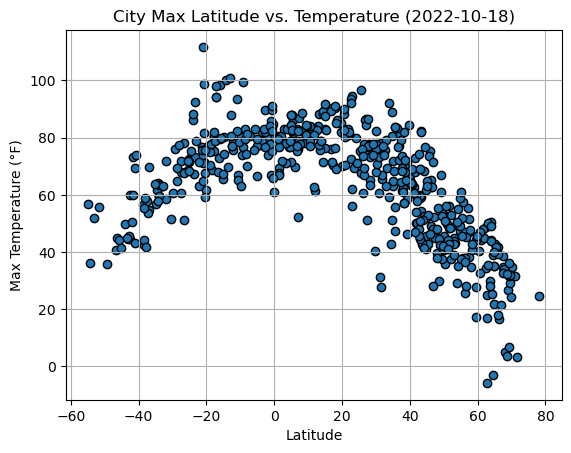

In [8]:
# Create the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Set the title, x-label, and y-label
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Set grid lines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

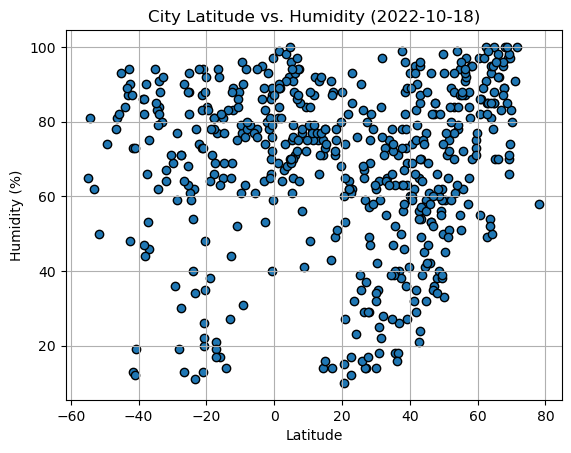

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

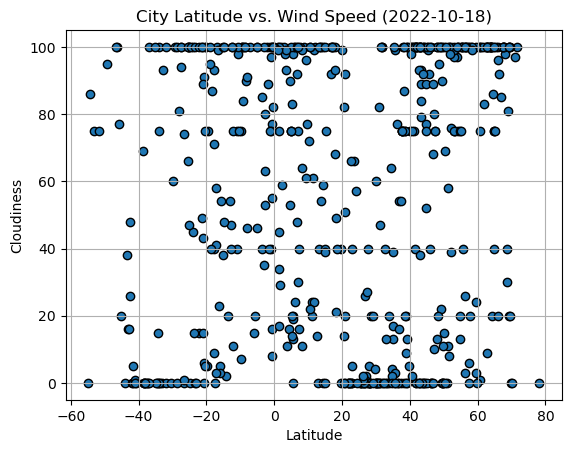

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

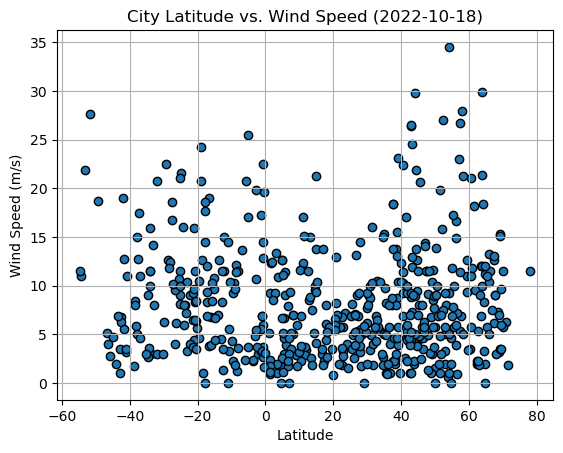

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


Text(-40, 50, 'y=-0.296X + 69.589')

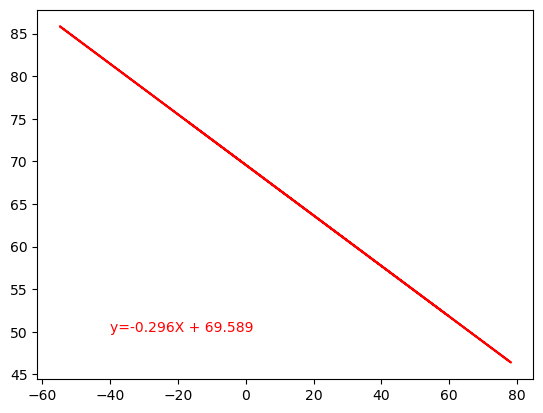

In [11]:
lr = linregress(city_data_df['Lat'],city_data_df['Max Temp'])
x = city_data_df.Lat
y = x*lr.slope+lr.intercept
plt.plot(x,y, color='r')
plt.annotate(f'y={lr.slope:.3f}X + {lr.intercept:.3f}', [-40,50], color='r')

<Axes: xlabel='Lat', ylabel='Max Temp'>

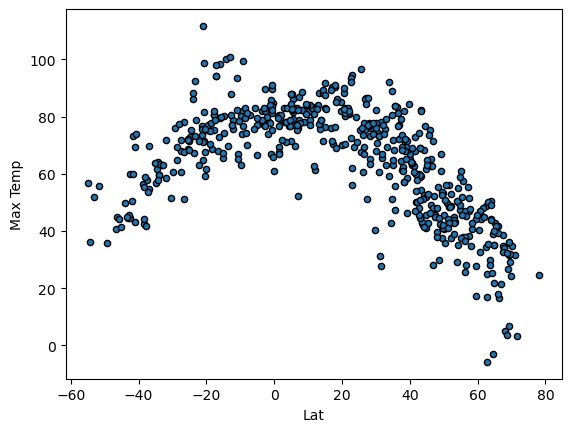

In [12]:
# Define a function to create Linear Regression plots
city_data_df.plot.scatter(x='Lat', y='Max Temp', marker="o", edgecolors="black")


In [13]:
# Create a DataFrame for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the first few rows of the Northern Hemisphere DataFrame
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,xingcheng,40.6167,120.7167,63.03,74,100,10.22,CN,Tue Oct 17 14:15:30 2023
2,tubarjal,30.4999,38.2160,74.30,35,0,8.95,SA,Tue Oct 17 14:15:31 2023
4,as saffaniyah,27.9708,48.7300,77.94,49,0,3.15,SA,Tue Oct 17 14:15:31 2023
6,pathein,16.7833,94.7333,75.94,91,92,2.98,MM,Tue Oct 17 14:15:31 2023
7,fort bragg,35.1390,-79.0060,71.82,47,17,5.01,US,Tue Oct 17 14:15:31 2023


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uturoa,-16.7333,-151.4333,79.43,77,100,19.01,PF,Tue Oct 17 14:15:30 2023
3,invercargill,-46.4000,168.3500,45.01,81,100,4.00,NZ,Tue Oct 17 14:15:31 2023
5,antsiranana,-12.2787,49.2917,75.63,83,11,11.45,MG,Tue Oct 17 14:15:31 2023
9,port-aux-francais,-49.3500,70.2167,35.91,74,95,18.70,TF,Tue Oct 17 14:15:31 2023
10,margaret river,-33.9500,115.0667,59.54,84,100,10.00,AU,Tue Oct 17 14:15:31 2023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is = 0.6619430023029885


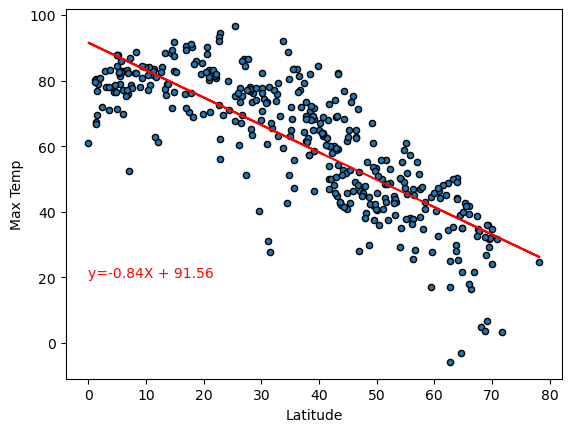

In [15]:
northern_hemi_df.plot.scatter(x='Lat', y='Max Temp', marker="o", edgecolors="black")
lr = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
x = northern_hemi_df.Lat
y = x*lr.slope+lr.intercept
plt.plot(x,y, color='r')
plt.annotate(f'y={lr.slope:.2f}X + {lr.intercept:.2f}', [0,20], color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp");
print(f"The r-value is = {lr.rvalue**2}")

The r-value is = 0.5158395031869157


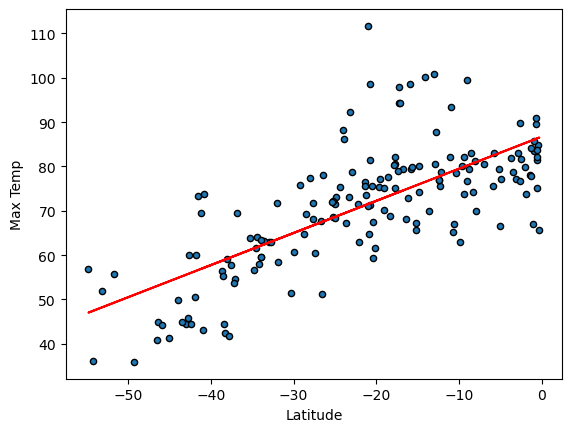

In [16]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp', marker="o", edgecolors="black")
lr = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
x = southern_hemi_df.Lat
y = x*lr.slope+lr.intercept
plt.plot(x,y, color='r')
plt.annotate(f'y={lr.slope:.2f}X + {lr.intercept:.2f}', [0,20], color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp");
print(f"The r-value is = {lr.rvalue**2}")

**Discussion about the linear relationship:** Given that the r value is at a 0.5 there does seem to be a coralation between latitude and max temp. The further away from 0 degrees lat the colder it gets.

### Humidity vs. Latitude Linear Regression Plot

The r-value is = 0.01359839284356995


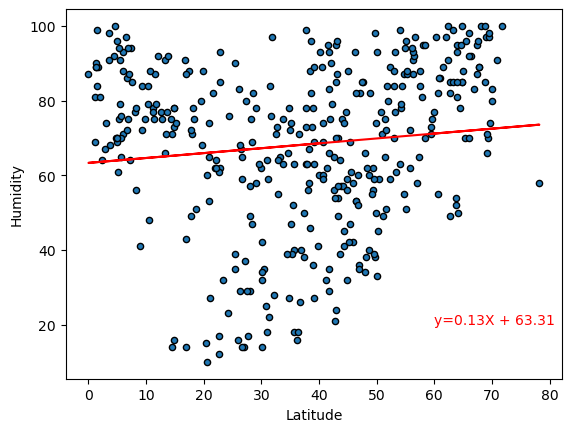

In [17]:
northern_hemi_df.plot.scatter(x='Lat', y='Humidity', marker="o", edgecolors="black")
lr = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
x = northern_hemi_df.Lat
y = x*lr.slope+lr.intercept
plt.plot(x,y, color='r')
plt.annotate(f'y={lr.slope:.2f}X + {lr.intercept:.2f}', [60,20], color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity");
print(f"The r-value is = {lr.rvalue**2}")

The r-value is = 0.005808986875039293


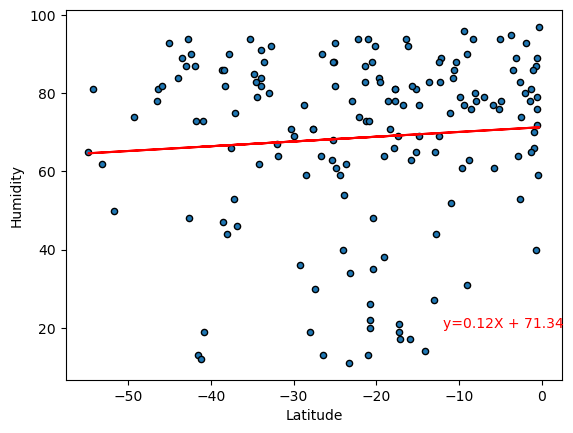

In [18]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Humidity', marker="o", edgecolors="black")
lr = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
x = southern_hemi_df.Lat
y = x*lr.slope+lr.intercept
plt.plot(x,y, color='r')
plt.annotate(f'y={lr.slope:.2f}X + {lr.intercept:.2f}', [-12,20], color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity");
print(f"The r-value is = {lr.rvalue**2}")

**Discussion about the linear relationship:**  There does nopt seem to be any linear relationship between Latitude and humidity. the r values being well below .05 in both instances suggests a low linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is = 0.02699712555278179


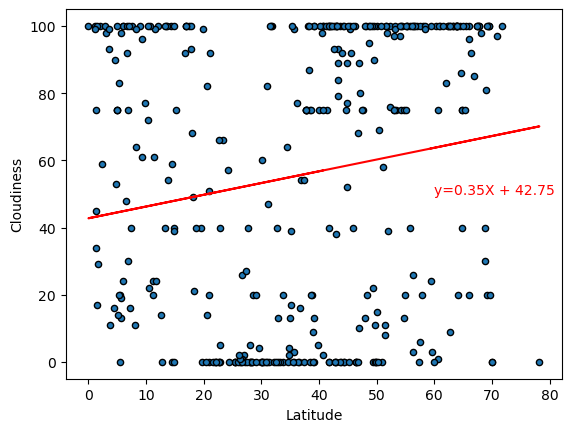

In [19]:
northern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', marker="o", edgecolors="black")
lr = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
x = northern_hemi_df.Lat
y = x*lr.slope+lr.intercept
plt.plot(x,y, color='r')
plt.annotate(f'y={lr.slope:.2f}X + {lr.intercept:.2f}', [60,50], color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness");
print(f"The r-value is = {lr.rvalue**2}")

The r-value is = 0.08959366711341961


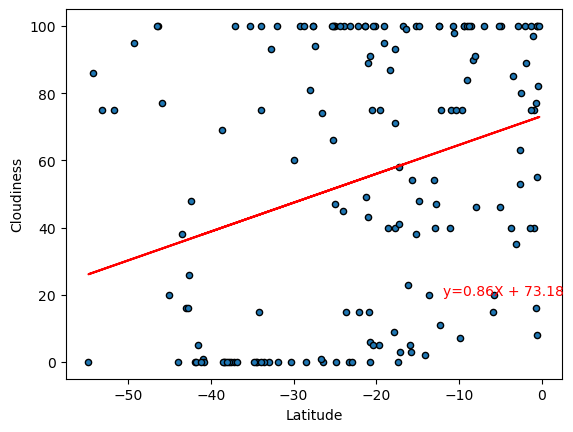

In [24]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', marker="o", edgecolors="black")
lr = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
x = southern_hemi_df.Lat
y = x*lr.slope+lr.intercept
plt.plot(x,y, color='r')
plt.annotate(f'y={lr.slope:.2f}X + {lr.intercept:.2f}', [-12,20], color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness");
print(f"The r-value is = {lr.rvalue**2}")

**Discussion about the linear relationship:** For the southern hemispheare and northern hemispheare there is little to no relation ship between cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is = 0.044940255118301325


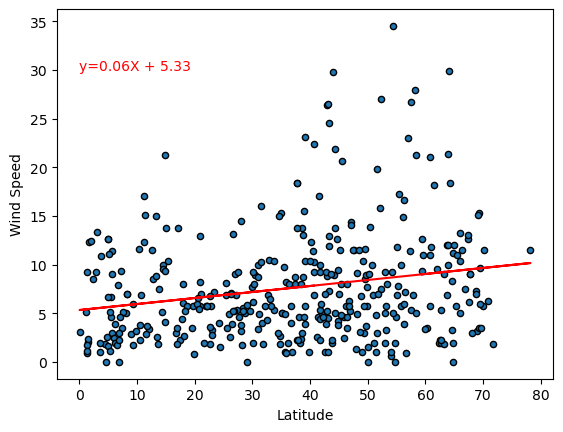

In [21]:
northern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', marker="o", edgecolors="black")
lr = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
x = northern_hemi_df.Lat
y = x*lr.slope+lr.intercept
plt.plot(x,y, color='r')
plt.annotate(f'y={lr.slope:.2f}X + {lr.intercept:.2f}', [0,30], color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed");
print(f"The r-value is = {lr.rvalue**2}")

The r-value is = 0.03499148085921259


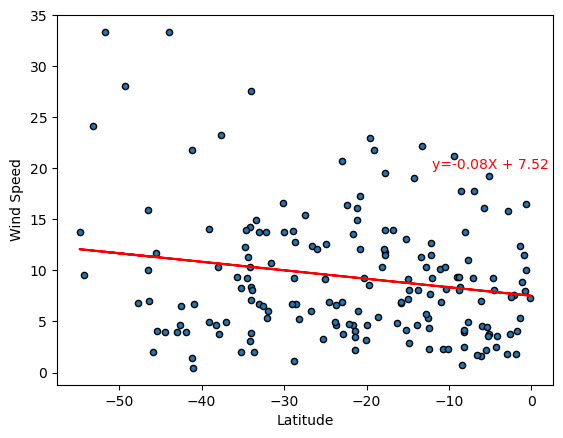

In [122]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', marker="o", edgecolors="black")
lr = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
x = southern_hemi_df.Lat
y = x*lr.slope+lr.intercept
plt.plot(x,y, color='r')
plt.annotate(f'y={lr.slope:.2f}X + {lr.intercept:.2f}', [-12,20], color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed");
print(f"The r-value is = {lr.rvalue**2}")

**Discussion about the linear relationship:** the linear relationship between wind speed and lat is small. with both r values for northern and soutrhern hemispheare beiung below the   0.05 mark.